# Determine the number of clusters present in the sequence embeddings

Use the Calinski Harabasz index for 5,000 sequences embedded with the Bacillus carbohydrate metabolism trained Protvec model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Read in the Calinski Harabasz data

In [2]:
ch_data = pd.read_csv('../Annotating_Bacterial_Function_Space_DATA/calinski_bacil.csv', index_col = 'Unnamed: 0')
ch_swiss_data = pd.read_csv('../Annotating_Bacterial_Function_Space_DATA/calinski_swissprot.csv', index_col = 'Unnamed: 0')
ch_kfreq_data = pd.read_csv('../Annotating_Bacterial_Function_Space_DATA/calinski_kmerfreq.csv'', index_col = 'Unnamed: 0')

In [5]:
c = len(ch_data.columns)
labels = [i+2 for i in range(c)]
ch_data.columns = labels
ch_data_df = ch_data.T.unstack().to_frame().sort_index(level=1).reset_index()

c = len(ch_swiss_data.columns)
labels = [i+2 for i in range(c)]
ch_swiss_data.columns = labels
ch_swiss_data_df = ch_swiss_data.T.unstack().to_frame().sort_index(level=1).reset_index()

c = len(ch_kfreq_data.columns)
labels = [i+2 for i in range(c)]
ch_kfreq_data.columns = labels
ch_kfreq_data_df = ch_kfreq_data.T.unstack().to_frame().sort_index(level=1).reset_index()

## Create Figure

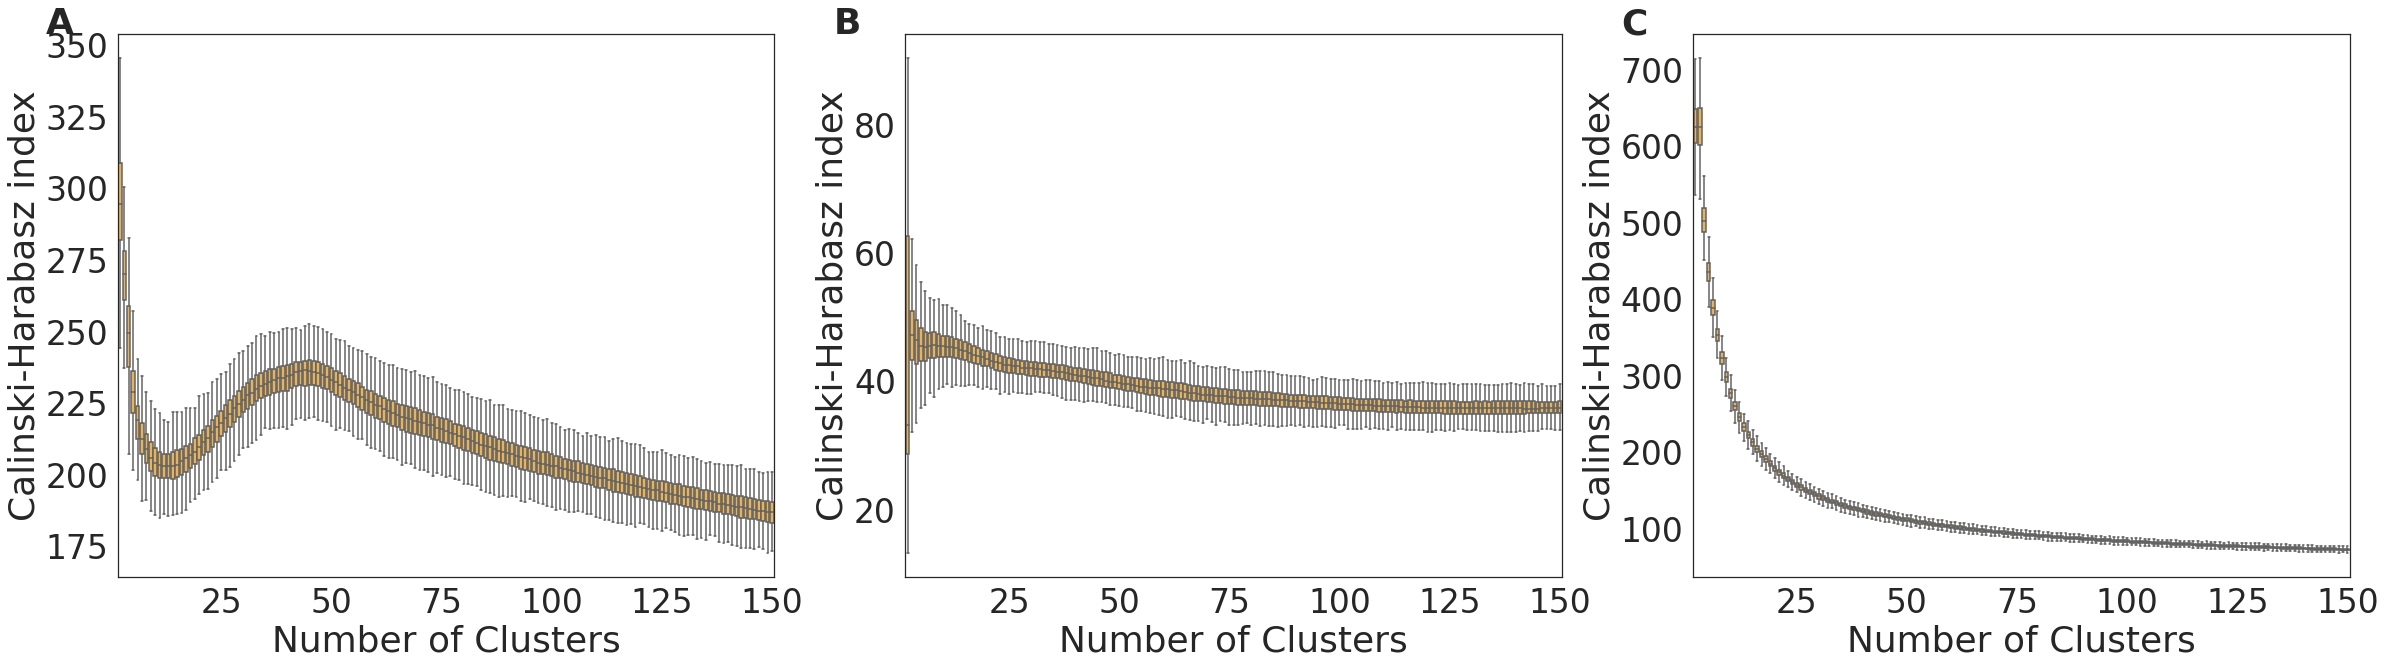

<Figure size 864x2592 with 0 Axes>

In [6]:
#create the seaborn figure
sns.set(font_scale = 3, style = 'white')
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(40,10))
sns.boxplot(ax = axes[0],x='level_1', y=0, data=ch_data_df, color = '#FFB944', showfliers=False)
sns.boxplot(ax = axes[2],x='level_1', y=0, data=ch_swiss_data_df, color = '#FFB944', showfliers=False)
sns.boxplot(ax = axes[1],x='level_1', y=0, data=ch_kfreq_data_df, color = '#FFB944', showfliers=False)

xticks=axes[0].xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%25!=23:
        xticks[i].set_visible(False)
        
xticks=axes[1].xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%25!=23:
        xticks[i].set_visible(False)
        
xticks=axes[2].xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%25!=23:
        xticks[i].set_visible(False)
        
        
axes[0].set(xlabel='Number of Clusters', ylabel= 'Calinski-Harabasz index')
axes[1].set(xlabel='Number of Clusters', ylabel= 'Calinski-Harabasz index')
axes[2].set(xlabel='Number of Clusters', ylabel= 'Calinski-Harabasz index')


axes[0].annotate("A", xy=(-0.11, 1), xycoords="axes fraction", weight='bold')
axes[1].annotate("B", xy=(-0.11, 1), xycoords="axes fraction", weight='bold')
axes[2].annotate("C", xy=(-0.11, 1), xycoords="axes fraction", weight='bold')

plt.figure(figsize=(12,36))
plt.savefig('numclusters.tiff', format='tiff')